In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sa
%matplotlib inline

In [7]:
pd.set_option('max_colwidth',-1)

In [4]:
con = sa.create_engine('sqlite:///edgar_htm_idx.db').connect()

In [10]:
ticker_df.columns

Index(['conm', 'type', 'cik', 'date', 'path', 'year', 'quarter', 'CIK',
       'Ticker', 'Name', 'Exchange', 'SIC', 'Business', 'Incorporated', 'IRS',
       'CIK', 'Ticker', 'Name', 'Exchange', 'SIC', 'Business', 'Incorporated',
       'IRS'],
      dtype='object')

In [16]:
import re, requests

def getCIKs(TICKERS):
    URL = 'http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany'
    CIK_RE = re.compile(r'.*CIK=(\d{10}).*')    
    cik_dict = {}
    for ticker in TICKERS:
        f = requests.get(URL.format(ticker), stream = True)
        results = CIK_RE.findall(f.text)
        if len(results):
            results[0] = int(re.sub('\.[0]*', '.', results[0]))
            cik_dict[str(ticker).upper()] = str(results[0])
    f = open('cik_dict', 'w')   
    print(cik_dict)
    f.close()

getCIKs(['nap','bidu'])

{'NAP': '1617049', 'BIDU': '1329099'}


In [19]:
def getCIK(ticker):
    URL = 'http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany'
    CIK_RE = re.compile(r'.*CIK=(\d{10}).*')    
    f = requests.get(URL.format(ticker), stream = True)
    results = CIK_RE.findall(f.text)
    if len(results):
        results[0] = int(re.sub('\.[0]*', '.', results[0]))
        return str(results[0])
    else:
        return None
        

In [37]:
ticker = 'NAP'
cik = getCIK(ticker)
ticker_df = pd.read_sql('select * from idx where cik={} and type in ("10-Q","10-K","20-F")'.format(cik), con)

In [38]:
ticker_df

,conm,type,cik,date,path,year,quarter
0,Navios Maritime Midstream Partners LP,20-F,1617049,2015-03-17,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-15-095533-index.htm,2015,1
1,Navios Maritime Midstream Partners LP,20-F,1617049,2016-03-08,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-16-496861-index.htm,2016,1
2,Navios Maritime Midstream Partners LP,20-F,1617049,2017-03-08,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-17-074840-index.htm,2017,1
3,Navios Maritime Midstream Partners LP,20-F,1617049,2018-03-09,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-18-077362-index.htm,2018,1


In [39]:
ticker_df

,conm,type,cik,date,path,year,quarter
0,Navios Maritime Midstream Partners LP,20-F,1617049,2015-03-17,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-15-095533-index.htm,2015,1
1,Navios Maritime Midstream Partners LP,20-F,1617049,2016-03-08,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-16-496861-index.htm,2016,1
2,Navios Maritime Midstream Partners LP,20-F,1617049,2017-03-08,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-17-074840-index.htm,2017,1
3,Navios Maritime Midstream Partners LP,20-F,1617049,2018-03-09,https://www.sec.gov/Archives/edgar/data/1617049/0001193125-18-077362-index.htm,2018,1


In [40]:
nap_df = pd.read_pickle('testout/NAP.pkl')

In [42]:
from xbrl_parser import *

In [43]:
nap_df = preprocess_df(nap_df)

In [45]:
nap_df_consolidated = get_consolidated_df(nap_df)

In [54]:
nap_df_consolidated.Account.value_counts()

us-gaap:CashAndCashEquivalentsAtCarryingValue                                                                                7
us-gaap:IncreaseDecreaseInAccountsPayable                                                                                    6
us-gaap:AmortizationOfDeferredCharges                                                                                        6
us-gaap:PaymentsToAcquireBusinessesGross                                                                                     6
us-gaap:OtherExpenses                                                                                                        6
us-gaap:DirectOperatingCosts                                                                                                 6
us-gaap:NetIncomeLoss                                                                                                        6
us-gaap:ProfessionalAndContractServicesExpense                                                                 

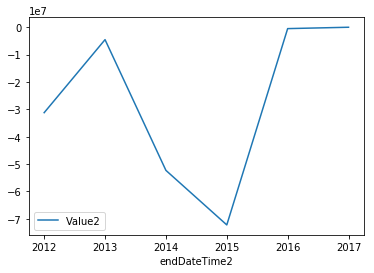

In [59]:
nap_df_consolidated.query("Account=='us-gaap:NetCashProvidedByUsedInInvestingActivities'").plot(x='endDateTime2',y='Value2')

In [1]:
import multiprocessing
multiprocessing.cpu_count()

24

In [1]:
import pandas as pd
F = pd.read_pickle('currents/F.pkl')

In [5]:
F.ReportDate.value_counts().sort_index()

2009-08-05     552
2009-11-06     556
2010-02-25     650
2010-05-07     392
2010-08-06    2206
2010-11-08    2229
2011-02-28    4594
2011-05-10    1988
2011-08-05    2443
2011-11-04    2427
2012-02-21    5327
2012-05-04    1832
2012-08-03    2234
2012-11-02    2301
2013-02-19    4916
2013-05-01    1686
2013-07-31    1974
2013-10-31    1998
2014-02-18    4495
2014-05-01    1587
2014-07-31    1825
2014-10-31    1807
2015-02-13    3835
2015-04-28    1242
2015-07-28    1604
2015-10-27    1608
2016-02-11    3653
2016-04-28    1044
2016-07-28    1125
2016-10-27    1255
2017-02-09    2654
2017-04-27    1138
2017-07-26    1513
2017-10-26    1518
2018-02-08    2831
2018-04-26    1184
2018-07-26    1553
Name: ReportDate, dtype: int64

In [4]:
F.ReportType.value_counts()

10-Q    44821
10-K    32955
Name: ReportType, dtype: int64

In [2]:
from xbrl_parser import get_consolidated_df

In [6]:
df = pd.read_pickle('consolidated/PEG.pkl')

In [7]:
df

,Value,Account,Category,Period,ContextID,isStartEndPeriod,isInstantPeriod,isForeverPeriod,startDateTime,endDateTime,...,cik,ReportDate,ReportType,Days,endDateTime2,to_consolidate,startDateTime2,Value2,Days2,Period2
0,1.500000e+07,peg:AccruedLiabilityForExcessSrecCosts,False,2009-01-012009-12-31,Duration_1_1_2009_To_12_31_2009,True,False,False,2009-01-01,2010-01-01,...,788784,2011-02-25,10-K,365.0,2009-12-31,False,2009-01-01,1.500000e+07,365.0,2009-01-012009-12-31
1,1.700000e+07,peg:AccruedLiabilityForExcessSrecCosts,False,2010-01-012010-09-30,Duration_1_1_2010_To_9_30_2010,True,False,False,2010-01-01,2010-10-01,...,788784,2010-10-29,10-Q,273.0,2010-09-30,False,2010-01-01,1.700000e+07,273.0,2010-01-012010-09-30
2,1.700000e+07,peg:AccruedLiabilityForExcessSrecCosts,False,2010-10-012010-12-31,Duration_10_1_2010_To_12_31_2010,True,False,False,2010-10-01,2011-01-01,...,788784,2011-05-05,10-Q,92.0,2010-12-31,False,2010-10-01,1.700000e+07,92.0,2010-10-012010-12-31
3,1.700000e+07,peg:AccruedLiabilityForExcessSrecCosts,False,2011-01-012011-03-31,Duration_1_1_2011_To_3_31_2011,True,False,False,2011-01-01,2011-04-01,...,788784,2011-05-05,10-Q,90.0,2011-03-31,False,2011-01-01,1.700000e+07,90.0,2011-01-012011-03-31
4,1.600000e+03,peg:AdditionalProcurementOfGenerationOfPowerCa...,False,2011-01-012011-06-30,Duration_1_1_2011_To_6_30_2011,True,False,False,2011-01-01,2011-07-01,...,788784,2011-08-03,10-Q,181.0,2011-06-30,False,2011-01-01,1.600000e+03,181.0,2011-01-012011-06-30
5,0.000000e+00,peg:AdoptionOfAccountingGuidanceForNonCreditLo...,False,2009-01-012009-12-31,Duration_1_1_2009_To_12_31_2009,True,False,False,2009-01-01,2010-01-01,...,788784,2012-02-27,10-K,365.0,2009-12-31,False,2009-01-01,0.000000e+00,365.0,2009-01-012009-12-31
6,-6.700000e+07,peg:AdoptionOfLeveragedLeaseCashFlowsGuidance,False,2007-01-012007-12-31,eol_PE3677----0910-K0007_STD_365_20071231_0,True,False,False,2007-01-01,2008-01-01,...,788784,2010-02-25,10-K,365.0,2007-12-31,False,2007-01-01,-6.700000e+07,365.0,2007-01-012007-12-31
7,9.500000e+07,peg:AmortizationOfNuclearFuel,False,2007-01-012007-12-31,eol_PE3677----0910-K0007_STD_365_20071231_0,True,False,False,2007-01-01,2008-01-01,...,788784,2010-02-25,10-K,365.0,2007-12-31,False,2007-01-01,9.500000e+07,365.0,2007-01-012007-12-31
8,4.800000e+07,peg:AmortizationOfNuclearFuel,False,2008-01-012008-06-30,SixMonthsEnded_30Jun20082,True,False,False,2008-01-01,2008-07-01,...,788784,2009-08-03,10-Q,182.0,2008-06-30,False,2008-01-01,4.800000e+07,182.0,2008-01-012008-06-30
9,7.500000e+07,peg:AmortizationOfNuclearFuel,False,2008-01-012008-09-30,NineMonthsEnded_30Sep2008,True,False,False,2008-01-01,2008-10-01,...,788784,2009-10-30,10-Q,274.0,2008-09-30,True,2008-07-01,2.700000e+07,92.0,2008-07-012008-09-30


In [8]:
df.Account.value_counts()

us-gaap:NetIncomeLoss                                                                                                      43
us-gaap:OperatingIncomeLoss                                                                                                43
us-gaap:CommonStockDividendsPerShareCashPaid                                                                               43
us-gaap:CostOfGoodsSoldDepreciationAndAmortization                                                                         43
us-gaap:WeightedAverageNumberOfDilutedSharesOutstanding                                                                    43
us-gaap:WeightedAverageNumberOfSharesOutstandingBasic                                                                      43
us-gaap:Revenues                                                                                                           43
us-gaap:EarningsPerShareBasic                                                                                         

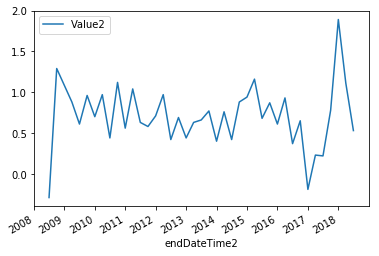

In [17]:
df.query("Account=='us-gaap:EarningsPerShareBasic' and Days<100").plot(x='endDateTime2',y='Value2')

In [18]:
df.query("isStartEndPeriod").Account.value_counts()

us-gaap:EarningsPerShareDiluted                                                                                               43
us-gaap:IncomeTaxExpenseBenefit                                                                                               43
us-gaap:CostOfServicesEnergyServices                                                                                          43
us-gaap:OperatingIncomeLoss                                                                                                   43
us-gaap:WeightedAverageNumberOfDilutedSharesOutstanding                                                                       43
us-gaap:InterestExpense                                                                                                       43
us-gaap:EarningsPerShareBasic                                                                                                 43
us-gaap:IncomeLossFromEquityMethodInvestments                                                    